In [1]:
import numpy as np
import os
import sys
import pandas as pd
import cv2
import glob

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('/home/hyunbin/git_repositories/rxrx1-utils')
import rxrx.io as rio

In [3]:
train_root_dir = "/data2/cell_perturbation/train/*"
train_dirs = glob.glob(train_root_dir)

train_dirs

['/data2/cell_perturbation/train/train.zip',
 '/data2/cell_perturbation/train/HEPG2-01',
 '/data2/cell_perturbation/train/HEPG2-02',
 '/data2/cell_perturbation/train/HEPG2-03',
 '/data2/cell_perturbation/train/HEPG2-04',
 '/data2/cell_perturbation/train/HEPG2-05',
 '/data2/cell_perturbation/train/HEPG2-06',
 '/data2/cell_perturbation/train/HEPG2-07',
 '/data2/cell_perturbation/train/HUVEC-01',
 '/data2/cell_perturbation/train/HUVEC-02',
 '/data2/cell_perturbation/train/HUVEC-03',
 '/data2/cell_perturbation/train/HUVEC-04',
 '/data2/cell_perturbation/train/HUVEC-05',
 '/data2/cell_perturbation/train/HUVEC-06',
 '/data2/cell_perturbation/train/HUVEC-07',
 '/data2/cell_perturbation/train/HUVEC-08',
 '/data2/cell_perturbation/train/HUVEC-09',
 '/data2/cell_perturbation/train/HUVEC-10',
 '/data2/cell_perturbation/train/HUVEC-11',
 '/data2/cell_perturbation/train/HUVEC-12',
 '/data2/cell_perturbation/train/HUVEC-13',
 '/data2/cell_perturbation/train/HUVEC-14',
 '/data2/cell_perturbation/trai

In [4]:
train_dir = train_dirs[1]
train_datas = glob.glob(train_dir +"/Plate1/*")
train_datas

['/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w1.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/B07_s2_w1.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w6.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/M11_s1_w4.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/J10_s2_w6.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/O13_s1_w1.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/L12_s1_w4.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/L09_s1_w6.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/D23_s1_w4.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/K07_s2_w5.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/H21_s1_w1.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/F07_s2_w3.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/B20_s2_w3.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/K20_s1_w5.png',
 '/data2/cell_perturbation/train/HEPG2-01/Plate1/H07_s1_w1.png',
 '/data2/cell_perturbatio

In [5]:
print(train_datas[0])
temp_img = cv2.imread(train_datas[0])
temp_img_gray = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)

/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w1.png


In [6]:
print(temp_img.shape)
print(np.max(temp_img))
print(np.min(temp_img))
print(np.mean(temp_img))

(512, 512, 3)
255
5
81.16901016235352


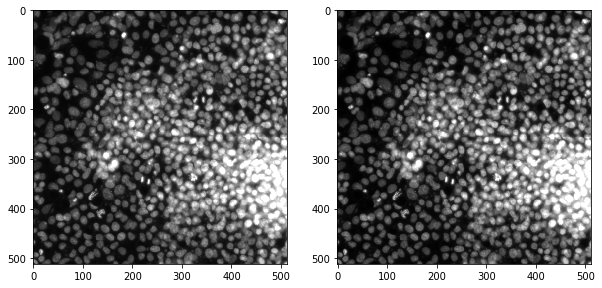

In [7]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)

plt.imshow(temp_img)

plt.subplot(1, 2, 2)

plt.imshow(temp_img_gray, cmap="gray")

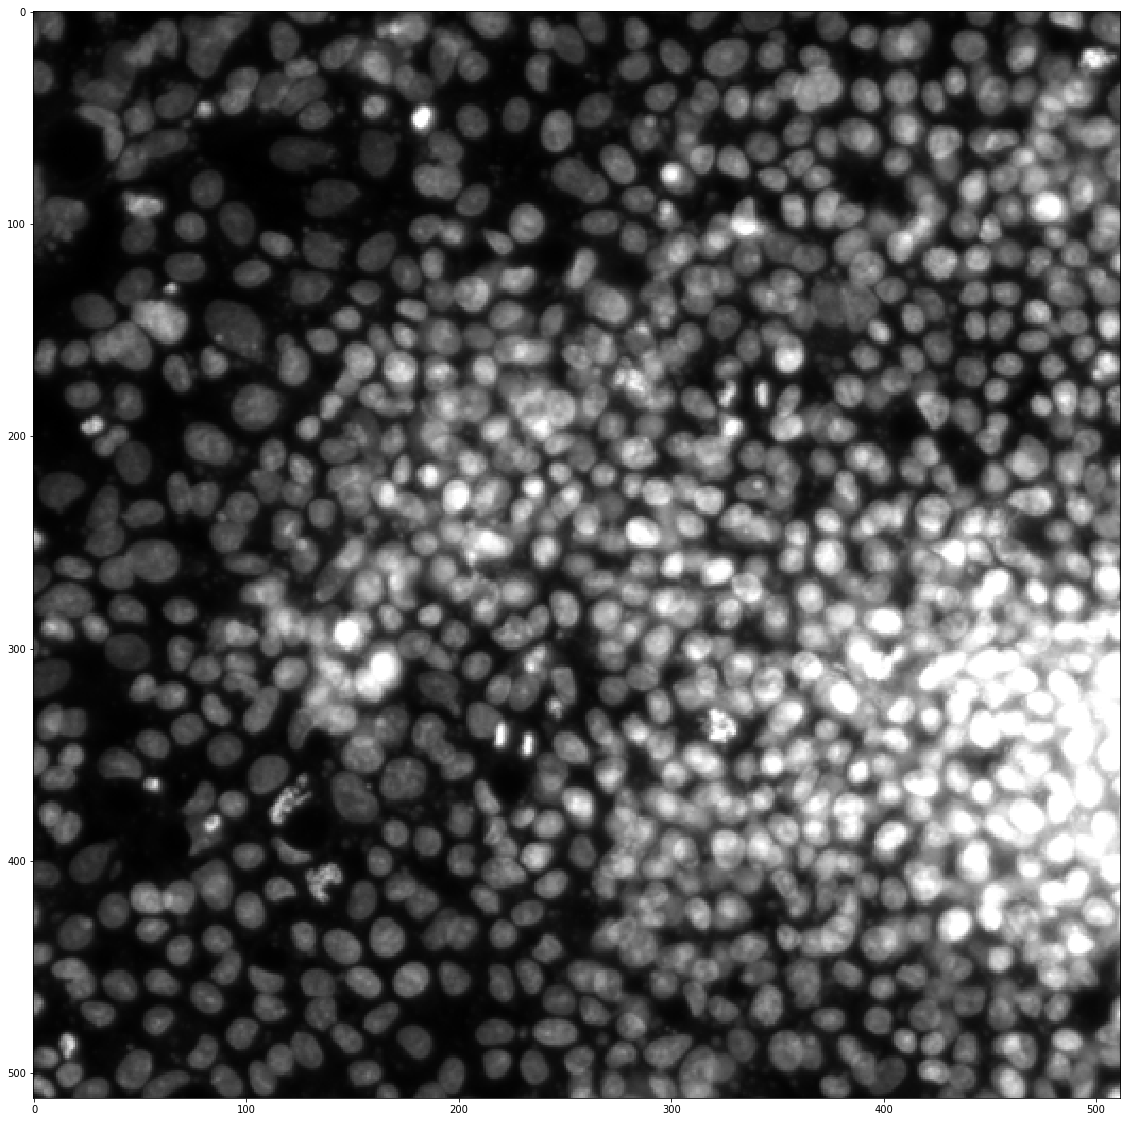

In [8]:
plt.figure(figsize=(20 ,20))
plt.imshow(temp_img_gray, cmap='gray')

In [9]:
from collections import defaultdict
value_per_pixel = defaultdict(int)

for i in temp_img_gray.flatten():
    value_per_pixel[i] += 1
    

In [10]:
value_per_pixel

defaultdict(int,
            {23: 2383,
             37: 1609,
             46: 1586,
             53: 1543,
             58: 1583,
             61: 1659,
             60: 1657,
             64: 1624,
             71: 1592,
             65: 1686,
             54: 1537,
             39: 1559,
             24: 2267,
             16: 3328,
             12: 3792,
             10: 3533,
             9: 2921,
             8: 2371,
             7: 1846,
             6: 1481,
             15: 3453,
             25: 2218,
             32: 1876,
             38: 1617,
             45: 1592,
             55: 1572,
             50: 1555,
             43: 1585,
             44: 1586,
             17: 3201,
             13: 3788,
             5: 437,
             11: 3853,
             14: 3799,
             19: 2924,
             18: 3022,
             27: 2065,
             78: 1601,
             83: 1630,
             88: 1532,
             85: 1541,
             81: 1657,
             82: 1581,


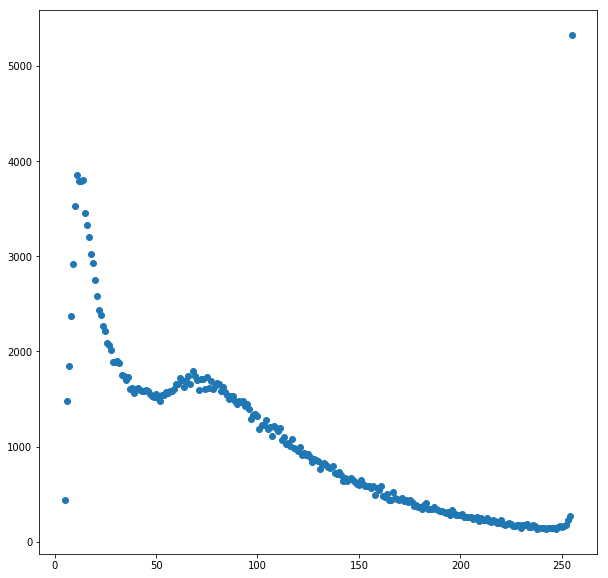

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(value_per_pixel.keys(), value_per_pixel.values())

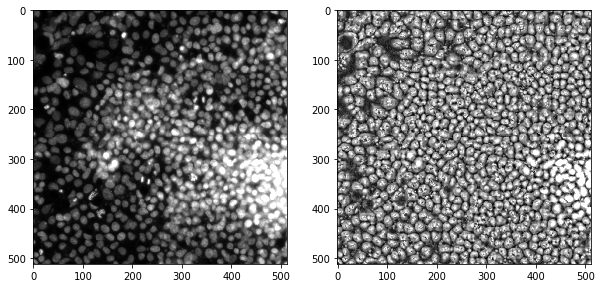

In [12]:
#img histogram equalization
clahe = cv2.createCLAHE(clipLimit=30, tileGridSize=(75, 75))
clahe_img = clahe.apply(temp_img_gray)

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(temp_img_gray, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap="gray")

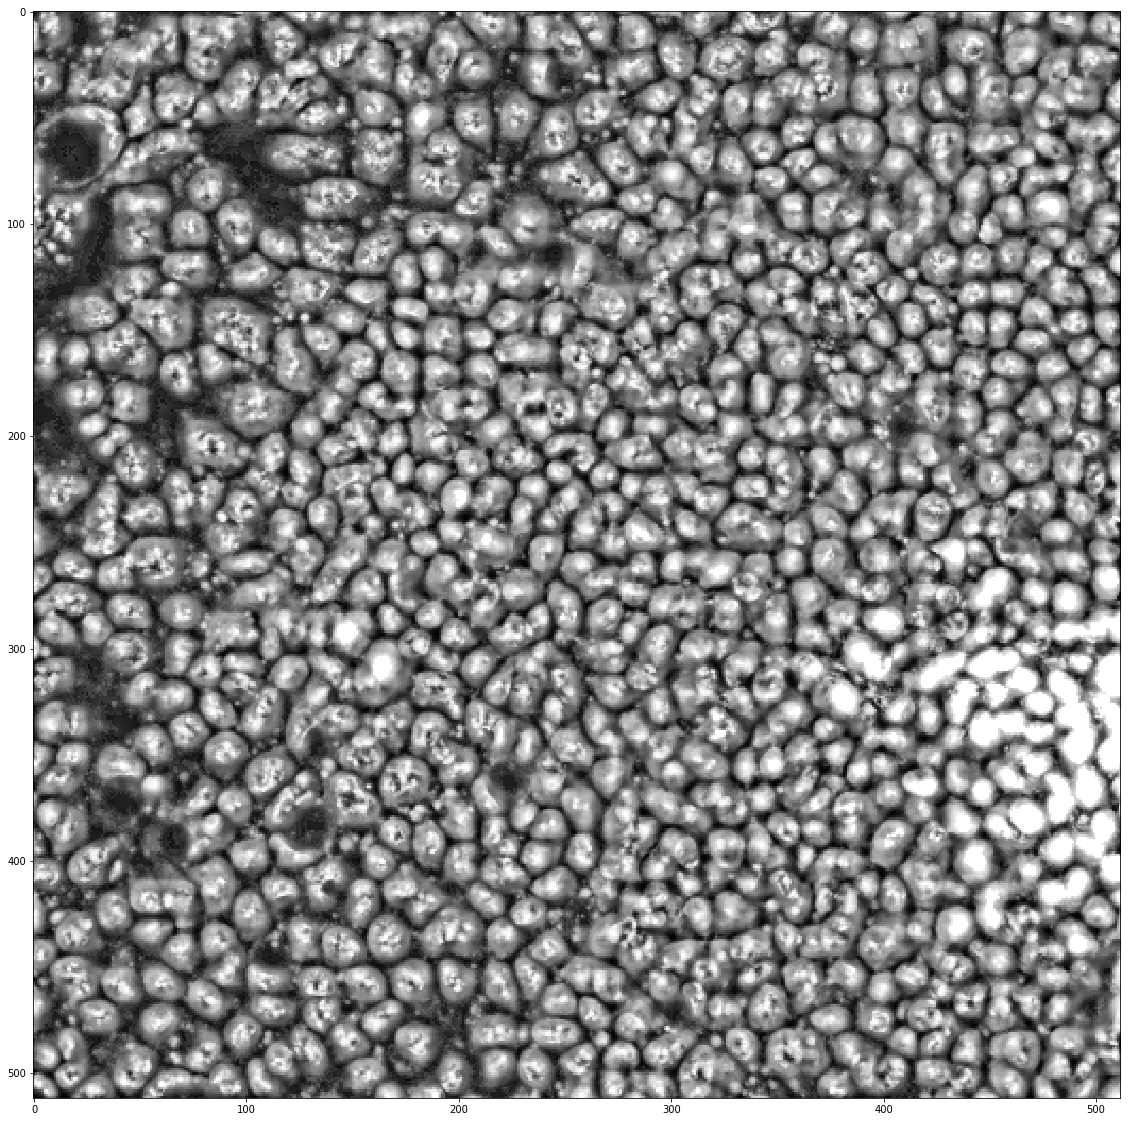

In [13]:
plt.figure(figsize=(20, 20))
plt.imshow(clahe_img, cmap='gray')

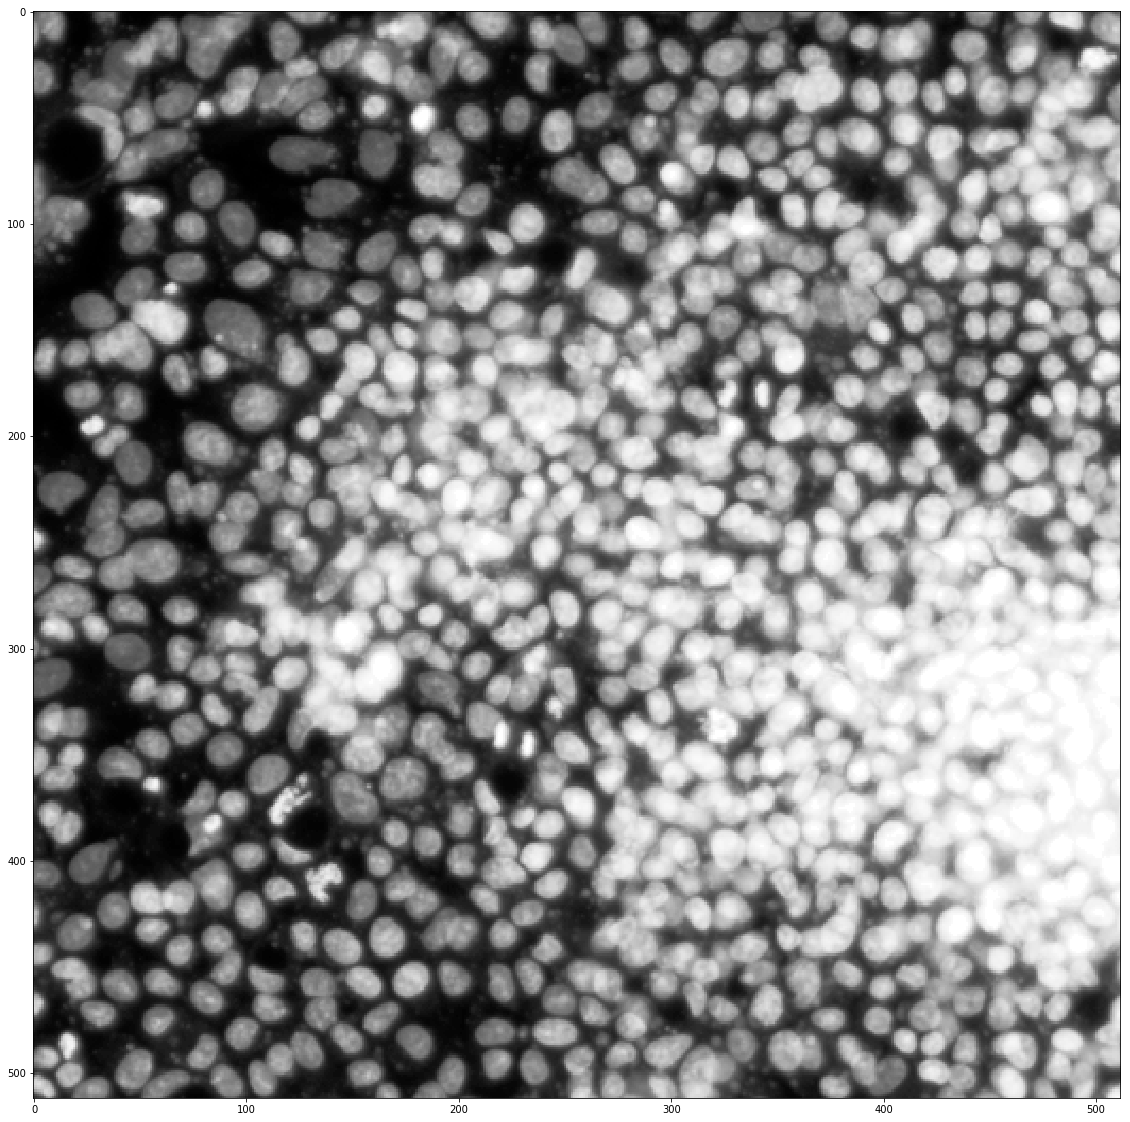

In [14]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.equalizeHist(temp_img_gray), cmap='gray')

In [ ]:
##rxrx 코드

In [17]:
print(train_datas[0])

/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w1.png


In [37]:
#rio_img = rio.load_image('train', 'HEPG2-01', 1, 'M17', 1)
rio_img = rio.load_images_as_tensor([i for i in train_datas[:6]])
rio_img.shape

(512, 512, 6)

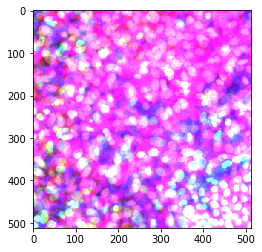

In [39]:
rio_img_color = rio.convert_tensor_to_rgb(rio_img)
plt.imshow(rio_img_color)

In [32]:
# rio_img = rio.load_site('train', 'HEPG2-01', 1, 'M17', 1)
# rio_img.shape

(512, 512, 6)

In [27]:
'train', 'RPE-05', 3, 'D19', 2
rio_img = rio.load_image("/d`ata2/cell_perturbation/train/RPE-05/Plate3/D19_s2_w1.png")
rio_img.shape

(512, 512)

### 다시 처음부터!

In [57]:
import os
import glob
import sys
from collections import defaultdict

def load_data_cell_perturbation(base_path="/data2/cell_perturbation/train/"):
    result = []
    
    wells = os.listdir(base_path)
    for well in wells:
        plates = os.listdir(os.path.join(base_path, well))
        for plate in plates:
            images = glob.glob(os.path.join(base_path, well, plate, "*"))
            temp_dict = defaultdict(list)
            
            for image in images:
                basename = os.path.basename(image)
                elem = basename.split("_")
                setname = "_".join(elem[:2])
                #channel = elem[2]
                temp_dict[setname].append(image)
                
            for val in temp_dict.values():
                #if len(val) != 6: continue
                result.append(sorted(val))
                
    return result

In [58]:
dataset = load_data_cell_perturbation()

In [61]:
print(len(dataset))
print(dataset[0])

not6 = 0
for i in dataset:
    if len(i) != 6:
        not6 += 1
        
print(not6)  # 모든 이미지의 채널 수 : 6

81224
['/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w1.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w2.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w3.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w4.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w5.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/M17_s1_w6.png']
0


/data2/cell_perturbation/train/HEPG2-01/Plate1/B07_s2_w1.png


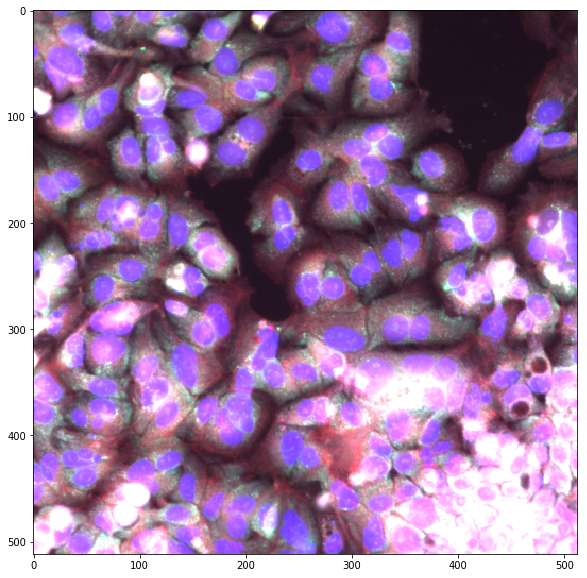

In [171]:
#잘 정렬되었는지 테스트
plt.figure(figsize=(10, 10))

print(dataset[1][0])
img_6channel = rio.load_images_as_tensor(dataset[1])
img_as_rgb = rio.convert_tensor_to_rgb(img_6channel)
plt.imshow(img_as_rgb)

In [89]:
def plot_channels(data):
    """
    visualize a set of images (6 channels) each in subplot (2 X 3)

    only use this function within jupyter notebook!!

    input : a list of images that is made by the same position, differently focused
            the length of th list should be 6

    input can be easily created as using the function 'load_dataset_cell_perturbation'

    ex)
    plot_channels(dataset[10])

    -AchB-
    """
    
    fig = plt.figure(figsize=(20, 20))

    for i in range(len(data)):
        tmp_img = plt.imread(data[i])
        plt.subplot(2, 3, i+1)
        plt.imshow(tmp_img, cmap='gray', figure=fig)
        plt.title("channel {}".format(i+1), figure=fig)
        
    return None

['/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w1.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w2.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w3.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w4.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w5.png', '/data2/cell_perturbation/train/HEPG2-01/Plate1/I11_s1_w6.png']


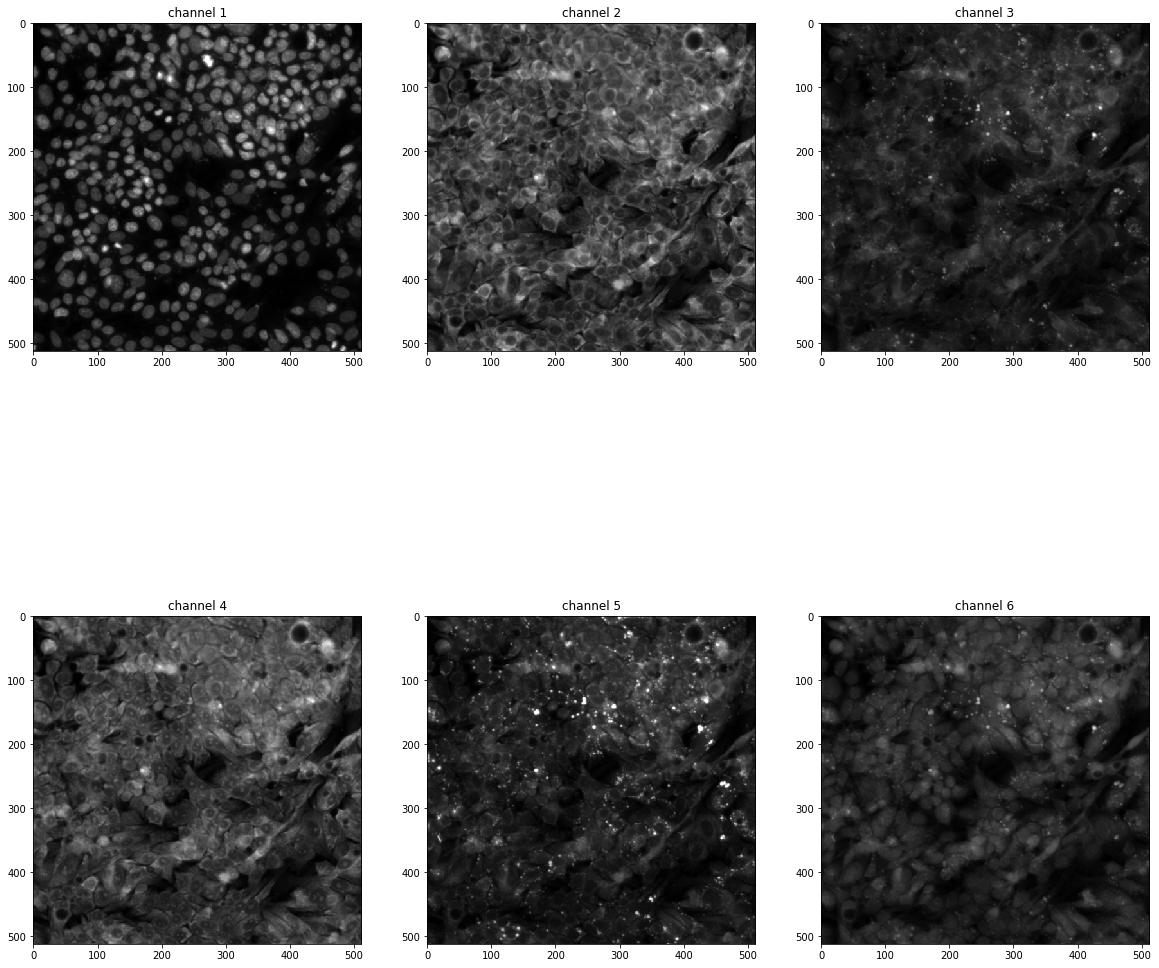

In [90]:
print(dataset[2])
plot_channels(dataset[2])


In [103]:
def plot_rgb(data, figsize=10):
    """
    convert 6-channels to RGB (3-channel)
    and visualize the figure.

    """
    dirs = data[0].split("/")
    base_plates = [dirs.index(i) for i in dirs if i.startswith("Plate")][0]
    pre = "_".join(dirs[base_plates-1: base_plates+1])
    suf = "_".join(os.path.basename(data[0]).split("_")[:2])

    imgname = "_".join((pre, suf))

    plt.figure(figsize=(figsize, figsize))

    img_6channel = rio.load_images_as_tensor(data)
    img_as_rgb = rio.convert_tensor_to_rgb(img_6channel)
    plt.title(imgname)
    plt.imshow(img_as_rgb)

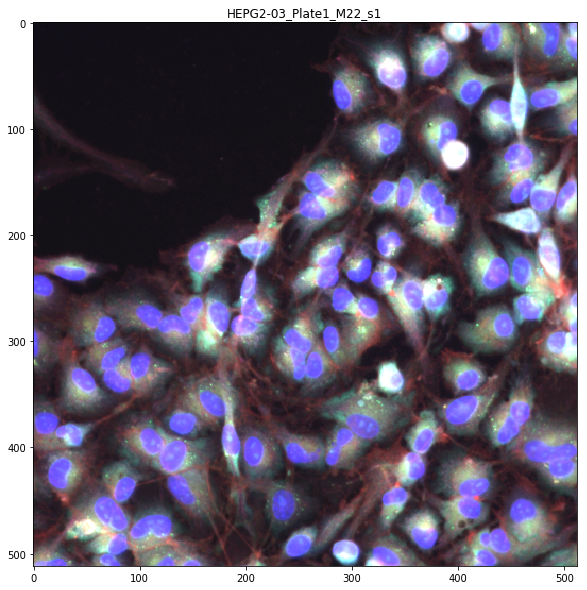

In [107]:
plot_rgb(dataset[5000])

In [117]:
temp_img_list = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in dataset[2]]


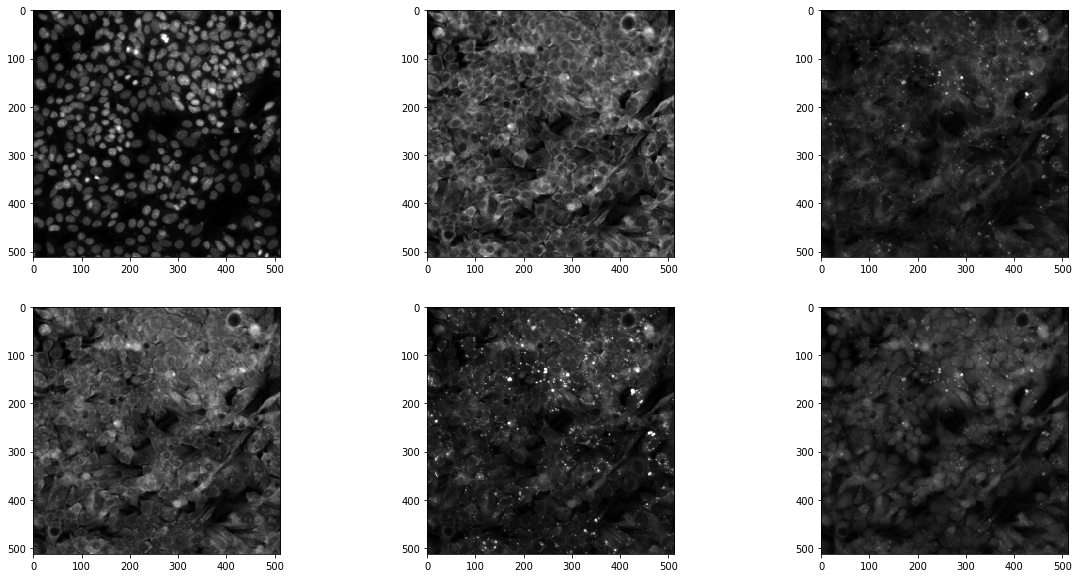

In [123]:
plt.figure(figsize=(20, 10))

for i in range(len(temp_img_list)):
    plt.subplot(2, 3, i+1)
    plt.imshow(temp_img_list[i], cmap='gray')

In [160]:
def plot_channels_with_clahe(data, cliplimit, tilesize):
    """
    visualize a set of images (6 channels) each in subplot (2 X 3)
    preprocessing images with CLAHE (a kind of histogram equalization)

    ex)
    compare between
    cliplimit = 3, tilesize= 3
    cliplimit = 15, tilesize = 3
    cliplimit = 15, tilesize = 15
    cliplimit = 15, tilesize = 75


    """
    temp_img_list = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in data]
    clahe = cv2.createCLAHE(clipLimit=cliplimit, tileGridSize=(tilesize, tilesize))
    clahe_img_list = [clahe.apply(i) for i in temp_img_list]

    plt.figure(figsize=(20, 10))

    for i in range(len(temp_img_list)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(clahe_img_list[i], cmap='gray')

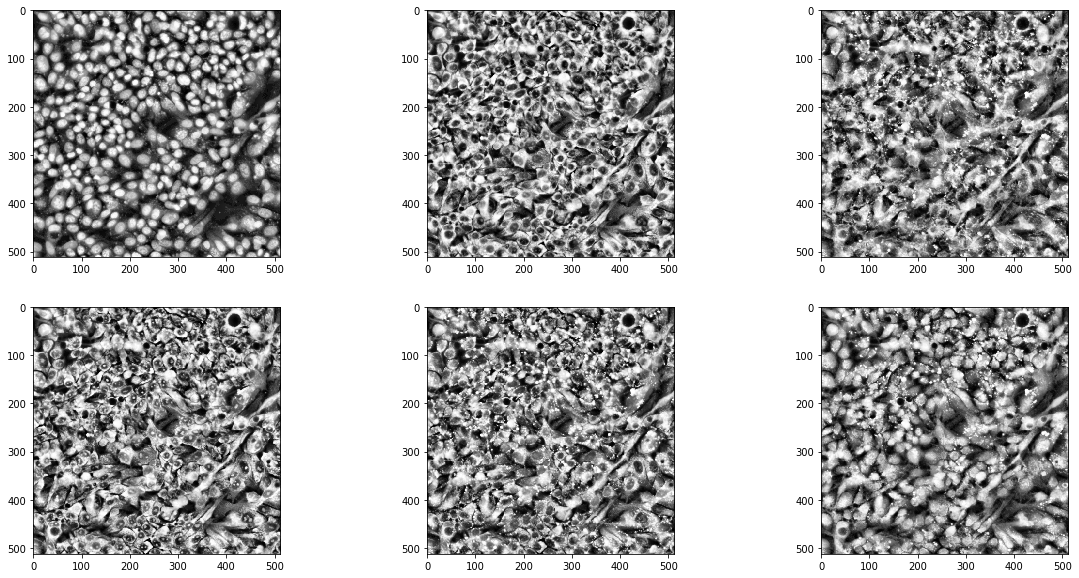

In [161]:
plot_channels_with_clahe(dataset[2], 15, 15)

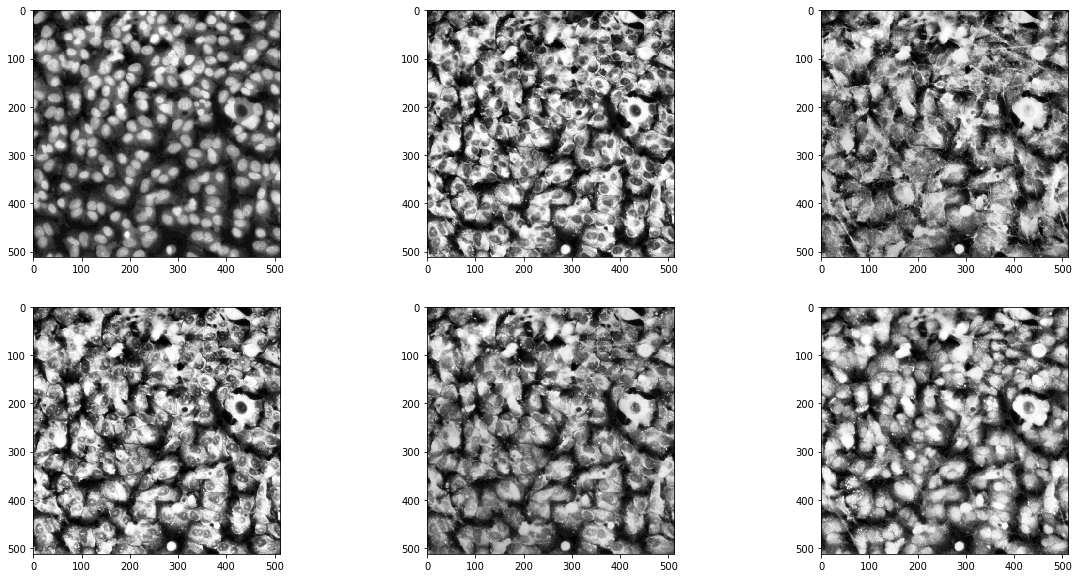

In [168]:
plot_channels_with_clahe(dataset[5], 15, 5)

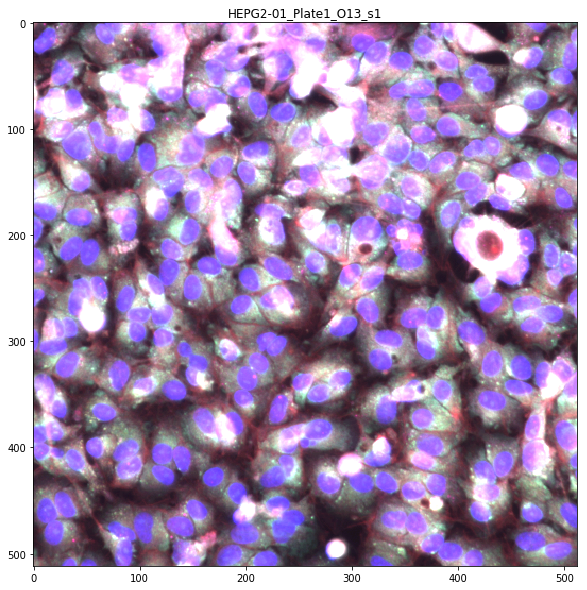

In [170]:
plot_rgb(dataset[5])